In [34]:
import torch
import numpy as np

In [35]:
x = torch.empty(2, 2)
x

tensor([[3.2455e-34, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])

In [36]:
x = torch.rand(2, 2)
x

tensor([[0.7676, 0.0353],
        [0.5317, 0.9853]])

In [37]:
y = torch.rand(2, 2)
y

tensor([[0.5832, 0.8109],
        [0.4943, 0.6333]])

In [38]:
z = torch.sub(x, y)
z

tensor([[ 0.1843, -0.7756],
        [ 0.0374,  0.3520]])

In [39]:
x[1, 1].item()

0.9853313565254211

In [40]:
a = torch.ones(2, 2)
b = a.numpy
a, b

(tensor([[1., 1.],
         [1., 1.]]), <function Tensor.numpy>)

In [41]:
a.add_(1)
a, b

(tensor([[2., 2.],
         [2., 2.]]), <function Tensor.numpy>)

In [42]:
a = np.ones(5)
b = torch.from_numpy(a)
a, b

(array([1., 1., 1., 1., 1.]),
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64))

In [43]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  x = torch.ones(5, device=device)
  y = torch.ones(5)
  y = y.to(device)
  z = x + y
  z = z.to("cpu") # gpu tensor is not avalable to convert to numpy
  z.numpy()

In [44]:
x = torch.ones(5, requires_grad=True)
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [45]:
x = torch.randn(3)
y = torch.randn(3, requires_grad=True)
x, y

(tensor([-0.3512,  1.3036,  0.0627]),
 tensor([-0.4602, -0.1074, -0.8415], requires_grad=True))

In [46]:
x = torch.ones(3, requires_grad=True)
print(x)

y = x + 2
print(y)

z = y * y * 2
print(z)
z = z.mean()
print(z)

z.backward()
print(x.grad)

tensor([1., 1., 1.], requires_grad=True)
tensor([3., 3., 3.], grad_fn=<AddBackward0>)
tensor([18., 18., 18.], grad_fn=<MulBackward0>)
tensor(18., grad_fn=<MeanBackward0>)
tensor([4., 4., 4.])


In [47]:
weight = torch.ones(4, requires_grad=True)

for epoch in range(4 ):
  model_output = (weight * 3).sum()
  model_output.backward()

  print(weight.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])


In [48]:
weight = torch.ones(4, requires_grad=True)

for epoch in range(4 ):
  model_output = (weight * 3).sum()
  model_output.backward()

  print(weight.grad)

  weight.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


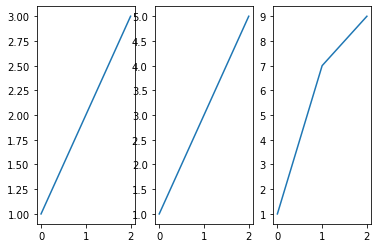

In [49]:
import matplotlib.pyplot as plt

base = [0, 1, 2] # x data

a = [1, 2, 3] # y data1
b = [1, 3, 5] # y data2
c = [1, 7, 9] # y data3

data = [a, b, c] # full data

fir, ax = plt.subplots(1,3)
for i in range(3):
  ax[i].plot(base, data[i])
plt.show()

In [50]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

y_hat = w * x
loss = (y_hat - y)**2

print(loss)

loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [51]:
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

def foward(x):
  return w * x

def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred - y).mean()

print(f"Prediction before training: f(5) = {foward(5):.3f}")

learning_rate = 0.01
n_iters = 15

for epoch in range(n_iters):
  y_pred = foward(x)

  l = loss(y, y_pred)

  dw = gradient(x, y, y_pred)

  w -= learning_rate * dw

  if epoch % 1 == 0:
    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {foward(5):.3f}")


Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [52]:
x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def foward(x):
  return w * x

def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

print(f"Prediction before training: f(5) = {foward(5):.3f}")

learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  y_pred = foward(x)

  l = loss(y, y_pred)

  l.backward()
  
  with torch.no_grad():
    w -= learning_rate * w.grad

  w.grad.zero_()

  if epoch % 10 == 0:
    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {foward(5):.3f}")

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [53]:
import torch.nn as nn

x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)


x_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = x.shape

input_size = output_size = n_features
model = nn.Linear(input_size, output_size)

print(f"Prediction before training: f(5) = {model(x_test).item():.3f}")

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  y_pred = model(x)

  l = loss(y, y_pred)

  l.backward()

  optimizer.step()

  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {model(x_test).item():.3f}")

Prediction before training: f(5) = 4.722
epoch 1: w = 1.006, loss = 7.48732662
epoch 11: w = 1.636, loss = 0.27817333
epoch 21: w = 1.743, loss = 0.08673935
epoch 31: w = 1.767, loss = 0.07715679
epoch 41: w = 1.776, loss = 0.07254855
epoch 51: w = 1.783, loss = 0.06832284
epoch 61: w = 1.790, loss = 0.06434600
epoch 71: w = 1.796, loss = 0.06060072
epoch 81: w = 1.802, loss = 0.05707340
epoch 91: w = 1.808, loss = 0.05375145
Prediction after training: f(5) = 9.614


In [54]:
import torch.nn as nn

x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)


x_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = x.shape

input_size = output_size = n_features

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)
  
model = LinearRegression(input_size, output_size)

print(f"Prediction before training: f(5) = {model(x_test).item():.3f}")

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  y_pred = model(x)

  l = loss(y, y_pred)

  l.backward()

  optimizer.step()

  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")

print(f"Prediction after training: f(5) = {model(x_test).item():.3f}")

Prediction before training: f(5) = 3.687
epoch 1: w = 1.123, loss = 14.45081043
epoch 11: w = 1.988, loss = 0.40764821
epoch 21: w = 2.123, loss = 0.04235231
epoch 31: w = 2.141, loss = 0.03104987
epoch 41: w = 2.141, loss = 0.02901397
epoch 51: w = 2.137, loss = 0.02731924
epoch 61: w = 2.133, loss = 0.02572901
epoch 71: w = 2.129, loss = 0.02423142
epoch 81: w = 2.125, loss = 0.02282102
epoch 91: w = 2.122, loss = 0.02149272
Prediction after training: f(5) = 10.244


10 4323.84423828125
20 3226.0107421875
30 2432.084228515625
40 1857.3023681640625
50 1440.748779296875
60 1138.579345703125
70 919.192626953125
80 759.781005859375
90 643.8623657226562
100 559.512939453125


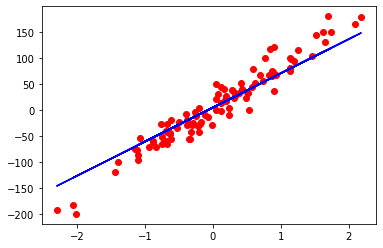

In [55]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x_numpy, y_numpy = datasets.make_regression(n_samples=100,
                                            n_features=1,
                                            noise=20,
                                            random_state=1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape

model = nn.Linear(n_features, 1)

creterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
  y_pred = model(x)
  loss = creterion(y_pred, y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(epoch+1, loss.item())

predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

bc = datasets.load_breast_cancer()

X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

class LogisticRegression(nn.Module):

  def __init__(self, n_input_feature):
    super(LogisticRegression, self).__init__()

    self.linear = nn.Linear(n_input_feature, 1)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = LogisticRegression(n_features)

creterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
  y_pred = model(X_train)
  loss = creterion(y_pred, y_train)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(epoch+1, loss.item())

10 0.5877214670181274
20 0.47755682468414307
30 0.4097936749458313
40 0.3639671206474304
50 0.3306463658809662
60 0.3051146864891052
70 0.2847827672958374
80 0.26811251044273376
90 0.25413087010383606
100 0.2421901822090149


In [57]:
with torch.no_grad():
  y_pred = model(X_test)
  y_pred_cls = y_pred.round()
  acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(acc)


tensor(0.8860)
